In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split, cross_val_score
import os
from itertools import cycle
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, linear_model, metrics, datasets, multiclass, svm
import seaborn as sns
import numpy.random as nr

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import json
import re
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier


from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Flatten, Dense, Dropout
from keras.layers import SimpleRNN
from keras.layers import LSTM

pd.set_option('display.max_colwidth', 200)

In [11]:
import csv

news_text = []
news_label = []

# Open the CSV file and read its contents
with open('/content/drive/MyDrive/Mentorness_Intern/english_news_dataset.csv', 'r', newline='') as file:
    reader = csv.DictReader(file)

    # Iterate over each row in the CSV file
    for row in reader:
        # Extract data from columns
        headline = row['Headline']
        content = row['Content']
        category = row['News Categories']

        # Append the extracted data to the respective lists
        news_label.append(category)
        news_text.append(headline + ' ' + content)

# Check the lengths of the lists
print(len(news_label), len(news_text))


199706 199706


In [12]:
import pandas as pd
news_df = pd.DataFrame({'Headline': news_text, 'News Categories': news_label})
print(news_df.head())

# Save the DataFrame to a new CSV file
news_df.to_csv('/content/drive/MyDrive/Mentorness_Intern/processed_news_dataset.csv', index=False)


                                                                                                                                                                                                  Headline  \
0  Congress leader Baljinder Singh shot dead at home in Punjab's Moga Congress leader Baljinder Singh was shot dead at his house in Punjab's Moga on Monday, a video of which has also surfaced online....   
1  17-year-old girl preparing for NEET dies by suicide in Rajasthan's Kota Another NEET aspirant died by suicide in Rajasthan's Kota on Monday, taking the number of student suicides this year to arou...   
2  Hampers to welcome MPs in new Parliament tomorrow, pics surface In order to mark the first-ever working day of the new Parliament building, Members of Parliament will receive a copy of the Constit...   
3  Only 10% women lawmakers in RS, while only 14% in LS: INC's Kharge Congress President Mallikarjun Kharge, while speaking in the Rajya Sabha, said, "Women Reservation Bill sh

In [13]:
news_df.head()

,Headline,News Categories
0,"Congress leader Baljinder Singh shot dead at home in Punjab's Moga Congress leader Baljinder Singh was shot dead at his house in Punjab's Moga on Monday, a video of which has also surfaced online....",['national']
1,"17-year-old girl preparing for NEET dies by suicide in Rajasthan's Kota Another NEET aspirant died by suicide in Rajasthan's Kota on Monday, taking the number of student suicides this year to arou...",['national']
2,"Hampers to welcome MPs in new Parliament tomorrow, pics surface In order to mark the first-ever working day of the new Parliament building, Members of Parliament will receive a copy of the Constit...",['national']
3,"Only 10% women lawmakers in RS, while only 14% in LS: INC's Kharge Congress President Mallikarjun Kharge, while speaking in the Rajya Sabha, said, ""Women Reservation Bill should come. We all tried...",['national']
4,"Ganesh temple decorated with notes, coins worth ₹2.5 crore in Bengaluru The Sri Sathya Ganapathi Temple in Bengaluru adorned its premises and idols with Indian currency notes and coins worth ₹2.5 ...",['national']


In [15]:
news_df["News Categories"].value_counts()

['entertainment']                                                                     11021
['miscellaneous']                                                                     10545
['science']                                                                            8901
['national']                                                                           7552
['politics']                                                                           7473
                                                                                      ...  
['all', 'sports']                                                                         1
['all', 'sports', 'Asian_Games_2022']                                                     1
['Feel_Good_Stories', 'hatke', 'national', 'Health___Fitness']                            1
['Feel_Good_Stories', 'politics', 'education', 'business', 'startup', 'Lifestyle']        1
['politics', 'education', 'world']                                              

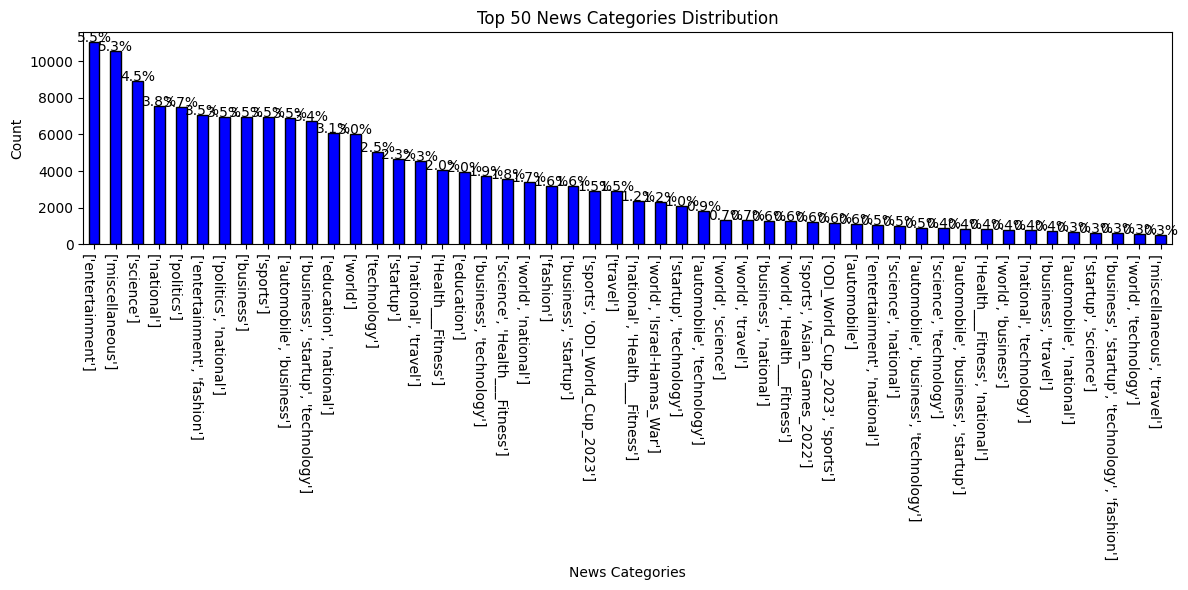

In [31]:
import matplotlib.pyplot as plt

# Assuming you have already calculated 'news_count' and 'news_percent'

# Slice the top 100 rows
top_100_news_count = news_count[:50]
top_100_news_percent = news_percent[:50]

# Create the bar plot
plt.figure(figsize=(12, 6))
top_100_news_count.plot(kind='bar', color='blue', edgecolor='black')

# Annotate each bar with the percentage
for idx, count in enumerate(top_100_news_count):
    plt.text(idx, count + 0.5, f'{top_100_news_percent[idx]:.1f}%', ha='center')

# Set plot title and labels
plt.title('Top 50 News Categories Distribution')
plt.xlabel('News Categories')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=270, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [32]:
# lets do some text preprocessing
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [33]:
def clean_text(text):

    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # remove BAD_SYMBOLS_RE symbols in text
    text = ' '.join(word for word in text.split(' ') if word not in STOPWORDS) # remove stopwords from text

    return text

In [35]:
news_df['Headline'] = news_df['Headline'].apply(clean_text)


In [36]:
# tokenizing is the process of splitting the text into tokens. It create word_index for each token
# which can be used to convert text sequence into integer sequence
max_words = 10000
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(news_df['Headline'])
sequence = tok.texts_to_sequences(news_df['Headline'])

In [37]:
len(sequence)

199706

In [38]:
# each of text in the news_df is converted to a sequence of words.
news_df['Headline'][0], len(news_df['Headline'][0].split())

('congress leader baljinder singh shot dead home punjabs moga congress leader baljinder singh shot dead house punjabs moga monday  video also surfaced online according report free press journal  singh received call someone regarding signing documents video  accused seen shooting singh walking towards ',
 42)

In [39]:
sequence[0], len(sequence[0])


([46,
  138,
  77,
  985,
  667,
  221,
  8054,
  46,
  138,
  77,
  985,
  667,
  307,
  8054,
  167,
  7,
  6,
  347,
  92,
  50,
  24,
  602,
  1686,
  1200,
  77,
  245,
  803,
  1063,
  1508,
  8894,
  2283,
  7,
  210,
  94,
  1787,
  77,
  1854,
  720],
 38)

In [40]:
news_df['Headline'][1], len(news_df['Headline'][1].split())


('17yearold girl preparing neet dies suicide rajasthans kota another neet aspirant died suicide rajasthans kota monday  taking number student suicides year around 26 girl reportedly native ups mau staying hostel citys vigyan nagar area rushed hospital reportedly started vomiting  passed away later',
 42)

In [41]:
sequence[1], len(sequence[1])

([6560,
  650,
  2464,
  1227,
  878,
  603,
  2598,
  1123,
  219,
  1227,
  4327,
  266,
  603,
  2598,
  1123,
  167,
  366,
  268,
  159,
  1937,
  14,
  56,
  688,
  650,
  82,
  5686,
  3540,
  6199,
  2246,
  4740,
  9459,
  2462,
  856,
  3178,
  242,
  82,
  407,
  5534,
  549,
  291,
  419],
 41)

In [42]:
word_index = tok.word_index
print(f'Found { len(word_index) } unique tokens.')

Found 75292 unique tokens.


In [43]:
news_df.head()

,Headline,News Categories
0,congress leader baljinder singh shot dead home punjabs moga congress leader baljinder singh shot dead house punjabs moga monday video also surfaced online according report free press journal sin...,['national']
1,17yearold girl preparing neet dies suicide rajasthans kota another neet aspirant died suicide rajasthans kota monday taking number student suicides year around 26 girl reportedly native ups mau s...,['national']
2,hampers welcome mps new parliament tomorrow pics surface order mark firstever working day new parliament building members parliament receive copy constitution india books related parliament co...,['national']
3,10 women lawmakers rs 14 ls incs kharge congress president mallikarjun kharge speaking rajya sabha said women reservation bill come tried issue chair raise highlighting number women lawmak...,['national']
4,ganesh temple decorated notes coins worth 25 crore bengaluru sri sathya ganapathi temple bengaluru adorned premises idols indian currency notes coins worth 25 crore occasion ganesh chathurthi dec...,['national']


In [44]:
# lets veiw the number of words in the headlines on each new group
news_df['word_seq'] = sequence
news_df['num_words'] = news_df['word_seq'].str.len()

In [45]:
news_df.groupby('News Categories').mean()

<ipython-input-45-fe132a1513e6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  news_df.groupby('News Categories').mean()


,num_words
News Categories,
"['Asia_Cup_2023', 'sports']",43.966667
"['Coronavirus', 'Health___Fitness']",42.000000
"['Coronavirus', 'national', 'Health___Fitness']",43.776224
"['Coronavirus', 'national', 'travel']",42.969231
"['Coronavirus', 'national']",44.476190
...,...
"['world', 'startup']",40.000000
"['world', 'technology', 'Israel-Hamas_War']",40.500000
"['world', 'technology']",39.805792


In [46]:
news_df.groupby('News Categories')['num_words'].min()

News Categories
['Asia_Cup_2023', 'sports']                        32
['Coronavirus', 'Health___Fitness']                42
['Coronavirus', 'national', 'Health___Fitness']    39
['Coronavirus', 'national', 'travel']              41
['Coronavirus', 'national']                        36
                                                   ..
['world', 'startup']                               40
['world', 'technology', 'Israel-Hamas_War']        34
['world', 'technology']                            26
['world', 'travel']                                31
['world']                                          21
Name: num_words, Length: 534, dtype: int64

In [48]:
# its seems like some headlines does not have complete text
news_df[news_df['num_words'] <= 3]

,Headline,News Categories,word_seq,num_words


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['num_words']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'num_words'}, axis=1)
              .sort_values('num_words', ascending=True))
  xs = counted['num_words']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('num_words', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('num_words')
_ = plt.ylabel('count()')

In [49]:
len(news_df[news_df['num_words'] <= 3])

0

In [50]:
# articles having few words are not providing sufficient information for classifying it into any group.
# also the number of such samples is less, so we can just not consider them
news_df = news_df[news_df['num_words'] > 3]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(news_df['Headline'], news_df['News Categories'], test_size=0.3, random_state=33)


## lets try our first baseline model using Naive Bayes Classifier

In [52]:
nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

print('accuracy %s : '% accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7441247162505007 : 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                                                                                                             precision    recall  f1-score   support

                                                                                                                                                ['Asia_Cup_2023', 'sports']       0.00      0.00      0.00        12
                                                                                                                                        ['Coronavirus', 'Health___Fitness']       0.00      0.00      0.00        13
                                                                                                                            ['Coronavirus', 'national', 'Health___Fitness']       0.00      0.00      0.00        50
                                                                                                                                      ['Coronavirus

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Linear Support Vector Machine

In [53]:
sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None))
])

sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

print('accuracy %s : ' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.830868607290693 : 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                                                                                                             precision    recall  f1-score   support

                                                                                                                                                ['Asia_Cup_2023', 'sports']       1.00      0.25      0.40        12
                                                                                                                                        ['Coronavirus', 'Health___Fitness']       0.93      1.00      0.96        13
                                                                                                                            ['Coronavirus', 'national', 'Health___Fitness']       0.97      0.74      0.84        50
                                                                                                                                      ['Coronavirus

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.830868607290693


In [58]:
from sklearn.pipeline import Pipeline

# Assuming you have your trained model sgd

while True:
    # Prompt the user to enter a headline
    headline = input("Enter a headline (or type 'quit' to exit): ")

    if headline.lower() == 'quit':
        break

    # Predict the news category
    predicted_category = sgd.predict([headline])

    # Print the predicted category
    print("Predicted category:", predicted_category[0])


Enter a headline (or type 'quit' to exit): Congress leader Baljinder Singh shot dead at home in Punjab's Moga
Predicted category: ['politics']
Enter a headline (or type 'quit' to exit): quit
